#### Helpful Packages

In [ ]:
 %pip install missingno
 %pip install pivottablejs
 %pip install pandas_profiling
 %pip install geopandas
 %pip install geodatasets
 %pip install seaborn

In [39]:
## 1. Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

### Introduction: We will be exploring the dataset specific to California State. Initially, we will be exploring the data for all the recreational activities which includes overnight stay.

In [40]:
df = pd.read_csv('california_2023.csv')

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (8,13,14,16,34) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [41]:
#Create a subset of dataframe for overnight usetype.
df = df[df['usetype'] == 'Overnight']
df.head(5)

,Unnamed: 0,historicalreservationid,ordernumber,agency,orgid,codehierarchy,regioncode,regiondescription,parentlocationid,parentlocation,...,totalbeforetax,discount,totalpaid,startdate,enddate,orderdate,nights,numberofpeople,equipmentdescription,equipmentlength
10187,604366,df985969-c745-436d-9b37-1a844aaf6358,0501990177-1,BLM,126,|1|70901|||10004620,NaN,NaN,607,Alabama Hills,...,11.0,0.0,11.0,2023-09-10T00:00:00Z,2023-09-11T00:00:00Z,2023-09-11T01:02:11.897377Z,1 day,3.0,NaN,0.0
10188,604367,4ab12848-58c3-4022-b5fb-e0b138fe189c,0507620887-1,BLM,126,|1|70901|||10004620,NaN,NaN,607,Alabama Hills,...,11.0,0.0,11.0,2023-09-29T00:00:00Z,2023-09-30T00:00:00Z,2023-09-30T23:55:17.6964Z,1 day,1.0,NaN,0.0
10189,604368,cd3681bb-a95e-43a9-97c1-3e3179058ae9,0508166071-1,BLM,126,|1|70901|||10004620,NaN,NaN,607,Alabama Hills,...,33.5,0.0,33.5,2023-09-16T00:00:00Z,2023-09-19T00:00:00Z,2023-09-17T02:01:28.057097Z,3 days,5.0,NaN,0.0
10190,604369,7bada6bb-8950-44b8-bcab-10adc56958a3,0516391927-1,BLM,126,|1|70901|||10004620,NaN,NaN,607,Alabama Hills,...,11.0,0.0,11.0,2023-09-28T00:00:00Z,2023-09-29T00:00:00Z,2023-09-28T22:44:14.004099Z,1 day,1.0,NaN,0.0
10191,604370,ddab8241-ca8d-4ccb-ac98-067a702e4add,0517273977-1,BLM,126,|1|70901|||10004620,NaN,NaN,607,Alabama Hills,...,11.0,0.0,11.0,2023-09-02T00:00:00Z,2023-09-03T00:00:00Z,2023-09-03T00:32:05.307648Z,1 day,1.0,NaN,0.0


#### All Categorical and non categorical Columns: Find out which columns are categorical and which are measurable.

In [42]:
print(df.dtypes)

Unnamed: 0                   int64
historicalreservationid     object
ordernumber                 object
agency                      object
orgid                        int64
codehierarchy               object
regioncode                  object
regiondescription           object
parentlocationid            object
parentlocation              object
legacyfacilityid           float64
park                        object
sitetype                    object
usetype                     object
productid                   object
inventorytype               object
facilityid                  object
facilityzip                float64
facilitystate               object
facilitylongitude          float64
facilitylatitude           float64
customerzip                 object
tax                        float64
usefee                     float64
tranfee                    float64
attrfee                    float64
totalbeforetax             float64
discount                   float64
totalpaid           

In [43]:
#What columns are categorical and what are measureable
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
print("Categorical columns:", categorical_columns)

Categorical columns: Index(['historicalreservationid', 'ordernumber', 'agency', 'codehierarchy',
       'regioncode', 'regiondescription', 'parentlocationid', 'parentlocation',
       'park', 'sitetype', 'usetype', 'productid', 'inventorytype',
       'facilityid', 'facilitystate', 'customerzip', 'startdate', 'enddate',
       'orderdate', 'nights', 'equipmentdescription'],
      dtype='object')


In [44]:
# Convert Number of nights to integer and remove the string 
df['numeric_nights'] = df['nights'].str.replace(' days', '').str.replace(' day', '').fillna('0').astype(int)
df['numeric_nights'] = np.where(df.numeric_nights < 0, 0, df.numeric_nights)
df['numeric_nights'].unique()

array([  1,   3,   2,   6,   4,   5,  14,  13,   7,   9,   8,  12,  11,
        10,  17,  20,  27,  18,   0,  24,  15,  25,  21,  16,  22, 141,
       129,  52,  19])

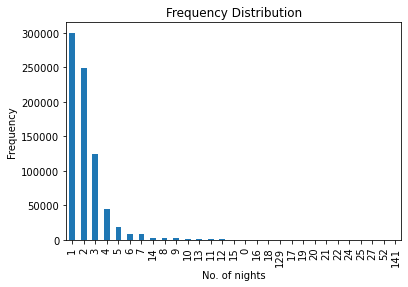

In [45]:
# Find the most number of nights people have preferred to book the campsites.
frequency = df['numeric_nights'].value_counts()
frequency.plot(kind='bar')
plt.title('Frequency Distribution')
plt.xlabel('No. of nights')
plt.ylabel('Frequency')
plt.show()


### Conclusion- Probablity of bookings for camping sights is more for 1 and 2 days compared to others.

In [46]:
# Find how many unique agencies are used for booking campsites and which is the most used agency in demand.
df['agency'].unique()

array(['BLM', 'BOR', 'NPS', 'Presidio Trust', 'USACE', 'USFS'],
      dtype=object)

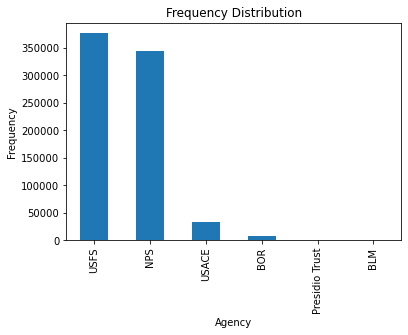

In [47]:
frequency = df['agency'].value_counts()
frequency.plot(kind='bar')
plt.title('Frequency Distribution')
plt.xlabel('Agency')
plt.ylabel('Frequency')
plt.show()


### Conclusion- Agency USFS and NPS are more preferred by users for there bookings.

In [48]:
# Find how many unique parent locations are there in California State according to this dataset.
df['parentlocation'].unique()

array(['Alabama Hills', 'Stony Gorge Reservoir', 'New Melones Lake',
       'Yosemite National Park', 'Sequoia & Kings Canyon National Parks',
       'Joshua Tree National Park',
       'Golden Gate National Recreation Area',
       'Whiskeytown National Recreation Area',
       'Death Valley National Park', 'Channel Islands National Park',
       'Lassen Volcanic National Park', 'Point Reyes National Seashore',
       'Pinnacles National Park',
       'San Francisco Maritime National Historical Park',
       'Presidio of San Francisco', 'Pine Flat Lake', 'Eastman Lake',
       'Lake Sonoma', 'Mendocino Lake', 'Black Butte Lake',
       'Hensley Lake', 'Success Lake', 'New Hogan Lake', 'Kaweah Lake',
       'Martis Creek Lake',
       'Humboldt-Toiyabe National Forest Headquarters',
       'Stanislaus National Forest', 'Plumas National Forest',
       'Tahoe National Forest', 'Eldorado National Forest',
       'Shasta-Trinity National Forest', 'San Bernardino National Forest',
       '

In [49]:
df['parentlocation'].nunique()

44

In [50]:
df['usetype'].unique()

array(['Overnight'], dtype=object)

In [51]:
# Find the different types of equipments selected by the campers for there overnight stay. Evaluate the frequency of each.
df['equipmentdescription'].unique()

array([nan, 'RV', 'Tent', 'Trailer', 'Vehicle', 'Large Tent Over 9X12`',
       'Pickup Camper', 'Caravan/Camper Van', 'Small Tent', 'Car',
       'Pop up', 'Hammock', 'Horse', 'Fifth Wheel', 'RV/Motorhome',
       'Boat'], dtype=object)

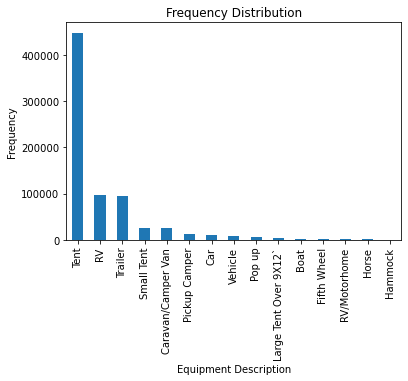

In [52]:
frequency = df['equipmentdescription'].value_counts()
frequency.plot(kind='bar')
plt.title('Frequency Distribution')
plt.xlabel('Equipment Description')
plt.ylabel('Frequency')
plt.show()


### Conclusion- Majority of bookings are done for Tent RV and Trailers for overnight campings.


In [53]:
df['equipmentlength'].unique()

array([0.0000000e+00, 1.9000000e+01, 1.8000000e+01, 1.6000000e+01,
       1.2000000e+01, 1.5000000e+01, 3.0000000e+01, 1.3000000e+01,
       3.2000000e+01, 2.3000000e+01, 1.0000000e+01, 2.0000000e+01,
       6.0000000e+00, 5.0000000e+00, 1.4000000e+01, 2.7000000e+01,
       2.5000000e+01, 3.5000000e+01, 1.7000000e+01, 2.1000000e+01,
       2.4000000e+01, 8.0000000e+00, 3.3000000e+01, 7.0000000e+00,
       2.8000000e+01, 1.1000000e+01, 3.0000000e+02, 4.0000000e+01,
       3.4000000e+01, 2.2000000e+01, 3.1000000e+01, 2.9000000e+01,
       2.6000000e+01, 9.0000000e+00, 1.8700000e+02, 4.0000000e+00,
       2.2000000e+02, 3.6000000e+01, 4.5000000e+01, 1.0000000e+02,
       3.9000000e+01, 3.8000000e+01, 5.0000000e+01, 4.1000000e+01,
       2.5000000e+02, 3.7000000e+01, 6.5000000e+01, 1.0000000e+00,
       2.4000000e+02, 1.9000000e+02, 5.5000000e+01, 1.4000000e+02,
       4.7000000e+01, 2.0000000e+00, 2.0000000e+02, 1.8000000e+02,
       2.0300000e+02, 2.8000000e+02, 4.3000000e+01, 1.8500000e

In [54]:
non_categorical_columns = df.select_dtypes(exclude=['object', 'category']).columns
print(non_categorical_columns)  

Index(['Unnamed: 0', 'orgid', 'legacyfacilityid', 'facilityzip',
       'facilitylongitude', 'facilitylatitude', 'tax', 'usefee', 'tranfee',
       'attrfee', 'totalbeforetax', 'discount', 'totalpaid', 'numberofpeople',
       'equipmentlength', 'numeric_nights'],
      dtype='object')


In [55]:
# Find the distribution of max of people booking at the once.
df['numberofpeople'].unique()

array([  3.,   1.,   5.,   2.,   4.,   6.,  12.,  40.,  20.,  50.,  25.,
        30.,  11.,  75., 100.,  35.,  18.,  16.,   9.,   8.,   7.,  55.,
        60.,  44.,  32.,  36.,  15.,  45.,  10.,  14.,  24.,  43.,  17.,
        13.,  19.,  33.,  21.,  48.,  28.,  27.,  22.,  29.,  31.,  38.,
        23.,  26.,  49.,  34.,  41.,  39.,   0., 160.,  90.,  80.,  99.,
        65.,  70.,  47.,  46.,  79., 110.,  58.,  51.,  53.,  74.,  54.,
        37.,  68.,  72.,  42.,  56.,  62.,  61.,  85.,  95.,  52., 150.,
        59., 120.,  82., 125.])

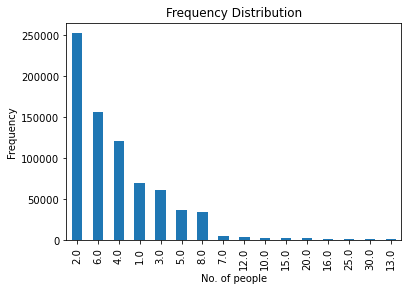

In [56]:
frequency = df['numberofpeople'].value_counts()
filtered_counts = frequency[frequency > 1000]
filtered_counts.plot(kind='bar')
plt.title('Frequency Distribution')
plt.xlabel('No. of people')
plt.ylabel('Frequency')
plt.show()


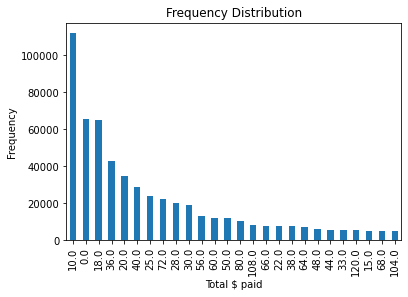

In [57]:
# Find the distribution of money paid for campsites.
frequency = df['totalpaid'].value_counts()
filtered_counts = frequency[frequency > 5000]
filtered_counts.plot(kind='bar')
plt.title('Frequency Distribution')
plt.xlabel('Total $ paid')
plt.ylabel('Frequency')
plt.show()


Categorical columns: Index(['historicalreservationid', 'ordernumber', 'agency', 'codehierarchy',
       'regioncode', 'regiondescription', 'parentlocationid', 'parentlocation',
       'park', 'sitetype', 'usetype', 'productid', 'inventorytype',
       'facilityid', 'facilitystate', 'customerzip', 'totalpaid', 'startdate',
       'enddate', 'orderdate', 'nights', 'equipmentdescription'],
      dtype='object')
Non- Categorical columns:   Index(['orgid', 'legacyfacilityid', 'facilityzip', 'facilitylongitude',
       'facilitylatitude', 'tax', 'usefee', 'tranfee', 'attrfee',
       'totalbeforetax', 'discount', 'numberofpeople', 'equipmentlength'],
      dtype='object')

Create a new dataframe with columns which are not relevant for our purpose. 

In [58]:
filtered_df= df[['agency','codehierarchy',
       'regioncode', 'regiondescription', 'parentlocationid', 'parentlocation',
       'park', 'sitetype', 'usetype','productid', 'inventorytype',
       'facilityid', 'facilitystate','totalpaid', 'startdate',
       'enddate', 'orderdate', 'nights', 'equipmentdescription','orgid', 'legacyfacilityid', 'facilityzip','totalbeforetax','numberofpeople']]

In [59]:
#convert new dataframe to csv
filtered_df.to_csv('filtered_df.csv', index=False) 

In [60]:
# Find how many percentage of columns are empty or Null values.
null_percentage = filtered_df.isnull().mean() * 100
print (null_percentage)

agency                  0.000000
codehierarchy           0.000000
regioncode              0.096640
regiondescription       0.096640
parentlocationid        0.000000
parentlocation          0.000000
park                    0.000000
sitetype                0.000262
usetype                 0.000000
productid               0.000000
inventorytype           0.000000
facilityid              0.000000
facilitystate           0.000000
totalpaid               0.000000
startdate               0.000000
enddate                 0.000000
orderdate               0.000000
nights                  0.000000
equipmentdescription    3.183990
orgid                   0.000000
legacyfacilityid        4.805620
facilityzip             0.000000
totalbeforetax          0.000000
numberofpeople          0.000000
dtype: float64


In [61]:
filtered_df.info()
filtered_df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 762628 entries, 10187 to 1002304
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   agency                762628 non-null  object 
 1   codehierarchy         762628 non-null  object 
 2   regioncode            761891 non-null  object 
 3   regiondescription     761891 non-null  object 
 4   parentlocationid      762628 non-null  object 
 5   parentlocation        762628 non-null  object 
 6   park                  762628 non-null  object 
 7   sitetype              762626 non-null  object 
 8   usetype               762628 non-null  object 
 9   productid             762628 non-null  object 
 10  inventorytype         762628 non-null  object 
 11  facilityid            762628 non-null  object 
 12  facilitystate         762628 non-null  object 
 13  totalpaid             762628 non-null  float64
 14  startdate             762628 non-null  object 


,totalpaid,orgid,legacyfacilityid,facilityzip,totalbeforetax,numberofpeople
count,762628.000000,762628.000000,7.259790e+05,762628.000000,762628.000000,762628.000000
mean,48.583913,129.678523,4.208689e+05,79529.017929,51.226596,4.134961
std,75.244098,3.740624,1.819691e+06,32571.624142,74.095731,4.129490
min,-24.320000,126.000000,1.490200e+04,1.000000,-26.000000,0.000000
25%,16.000000,128.000000,7.092500e+04,92241.000000,18.000000,2.000000
50%,32.000000,130.000000,7.157900e+04,93526.000000,36.000000,3.000000
75%,64.000000,131.000000,7.398400e+04,95321.000000,66.000000,6.000000
max,8558.000000,250.000000,1.022980e+07,108260.000000,7508.000000,160.000000


In [62]:
missing_values = filtered_df.isna().sum()
print(missing_values)

agency                      0
codehierarchy               0
regioncode                737
regiondescription         737
parentlocationid            0
parentlocation              0
park                        0
sitetype                    2
usetype                     0
productid                   0
inventorytype               0
facilityid                  0
facilitystate               0
totalpaid                   0
startdate                   0
enddate                     0
orderdate                   0
nights                      0
equipmentdescription    24282
orgid                       0
legacyfacilityid        36649
facilityzip                 0
totalbeforetax              0
numberofpeople              0
dtype: int64


We observed that equipment description and legacy facilty ID has lots of missing columns. We cannot fill in the data for it because it might be misleading. Instead we will ignore these columns for now and analyze the data further.

In [63]:
filtered_df.drop(['legacyfacilityid', 'equipmentdescription'], axis=1, inplace=True)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Lets convert facility Zip and number of people float columns to integer

In [64]:
columns_to_convert = ['facilityzip', 'numberofpeople']
filtered_df[columns_to_convert].astype('int')

,facilityzip,numberofpeople
10187,93545,3
10188,93545,1
10189,93545,5
10190,93545,1
10191,93545,1
...,...,...
1002300,95223,2
1002301,95223,2
1002302,95223,6
1002303,95223,2


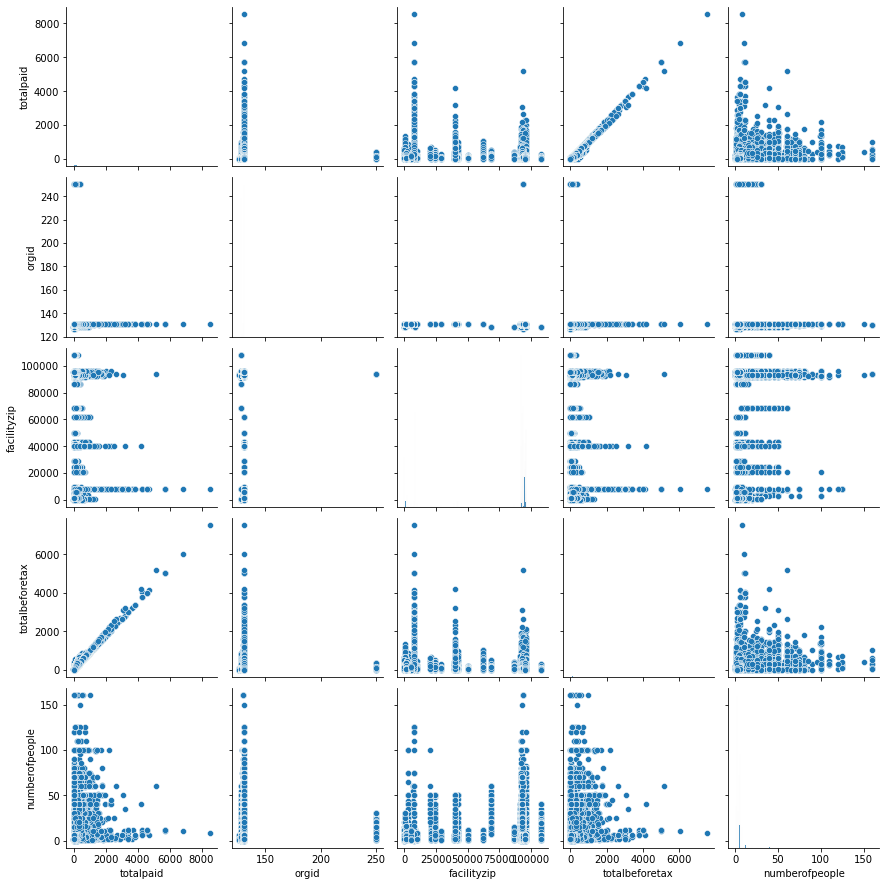

In [65]:
# Make a pairplot of new filtered df. It will help us understand if there are any valueable relationships in features.
sns.pairplot(filtered_df)

In [66]:
filtered_df.shape

(762628, 22)

We now have 22 columns and 762628 rows in our new dataframe.

Lets take difference between order date and start date and find any relationship for the facilityId and facility State. Convert FacilityId and parentlocationid,productid,nights into integer column.

In [67]:
filtered_df['facilityid'] = pd.to_numeric(df['facilityid'], errors='coerce')

<ipython-input-67-dded7c8a05be>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['facilityid'] = pd.to_numeric(df['facilityid'], errors='coerce')


In [68]:
filtered_df['parentlocationid'] = pd.to_numeric(df['parentlocationid'], errors='coerce')
filtered_df['productid'] = pd.to_numeric(df['productid'], errors='coerce')
filtered_df['nights'] = pd.to_numeric(df['nights'], errors='coerce')

<ipython-input-68-bc2cd159de45>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['parentlocationid'] = pd.to_numeric(df['parentlocationid'], errors='coerce')
<ipython-input-68-bc2cd159de45>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['productid'] = pd.to_numeric(df['productid'], errors='coerce')
<ipython-input-68-bc2cd159de45>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

In [112]:
filtered_df['orderdate_dt'] = pd.to_datetime(filtered_df['orderdate'], errors='coerce')

len(filtered_df['orderdate_dt'].unique())

<ipython-input-112-3fbed7e3e83e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['orderdate_dt'] = pd.to_datetime(filtered_df['orderdate'], errors='coerce')


692017

In [113]:
#Below calculations are performed to understand the trend of differences between orderdate and startdate of booking orders.

filtered_df['orderdate_dt'] = pd.to_datetime(filtered_df['orderdate'], errors='coerce')
filtered_df['start_dt'] =  pd.to_datetime(filtered_df['startdate'], errors='coerce')
filtered_df['delta_order_to_start'] = (filtered_df['start_dt'] - filtered_df['orderdate_dt']).dt.days
filtered_df['delta_order_to_start'].unique()
filtered_df['delta_order_to_start'].head()

<ipython-input-113-3cb0444da9f8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['orderdate_dt'] = pd.to_datetime(filtered_df['orderdate'], errors='coerce')
<ipython-input-113-3cb0444da9f8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['start_dt'] =  pd.to_datetime(filtered_df['startdate'], errors='coerce')
<ipython-input-113-3cb0444da9f8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

10187   -2
10188   -2
10189   -2
10190   -1
10191   -2
Name: delta_order_to_start, dtype: int64

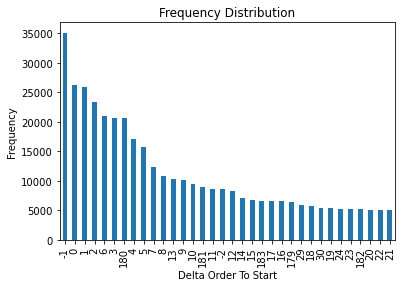

In [114]:
# create a frequency bar graph for the delta from order to start dates.
frequency = filtered_df['delta_order_to_start'].value_counts()
filtered_counts = frequency[frequency > 5000]
filtered_counts.plot(kind='bar')
plt.title('Frequency Distribution')
plt.xlabel('Delta Order To Start')
plt.ylabel('Frequency')
plt.show()


In [71]:
total_null_counts=filtered_df.isnull().sum()
print(total_null_counts)

agency                       0
codehierarchy                0
regioncode                 737
regiondescription          737
parentlocationid           624
parentlocation               0
park                         0
sitetype                     2
usetype                      0
productid                    0
inventorytype                0
facilityid                   0
facilitystate                0
totalpaid                    0
startdate                    0
enddate                      0
orderdate                    0
nights                  762563
orgid                        0
facilityzip                  0
totalbeforetax               0
numberofpeople               0
orderdate_dt                 0
start_dt                     0
delta_order_to_start         0
dtype: int64


In [72]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 762628 entries, 10187 to 1002304
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype              
---  ------                --------------   -----              
 0   agency                762628 non-null  object             
 1   codehierarchy         762628 non-null  object             
 2   regioncode            761891 non-null  object             
 3   regiondescription     761891 non-null  object             
 4   parentlocationid      762004 non-null  float64            
 5   parentlocation        762628 non-null  object             
 6   park                  762628 non-null  object             
 7   sitetype              762626 non-null  object             
 8   usetype               762628 non-null  object             
 9   productid             762628 non-null  int64              
 10  inventorytype         762628 non-null  object             
 11  facilityid            762628 non-null  int64   

In [73]:
filtered_df.head()

,agency,codehierarchy,regioncode,regiondescription,parentlocationid,parentlocation,park,sitetype,usetype,productid,...,enddate,orderdate,nights,orgid,facilityzip,totalbeforetax,numberofpeople,orderdate_dt,start_dt,delta_order_to_start
10187,BLM,|1|70901|||10004620,NaN,NaN,607.0,Alabama Hills,Tuttle Creek Campground,STANDARD NONELECTRIC,Overnight,10273956,...,2023-09-11T00:00:00Z,2023-09-11T01:02:11.897377Z,NaN,126,93545.0,11.0,3.0,2023-09-11 01:02:11.897377+00:00,2023-09-10 00:00:00+00:00,-2
10188,BLM,|1|70901|||10004620,NaN,NaN,607.0,Alabama Hills,Tuttle Creek Campground,STANDARD NONELECTRIC,Overnight,10273955,...,2023-09-30T00:00:00Z,2023-09-30T23:55:17.6964Z,NaN,126,93545.0,11.0,1.0,2023-09-30 23:55:17.696400+00:00,2023-09-29 00:00:00+00:00,-2
10189,BLM,|1|70901|||10004620,NaN,NaN,607.0,Alabama Hills,Tuttle Creek Campground,GROUP STANDARD NONELECTRIC,Overnight,10273983,...,2023-09-19T00:00:00Z,2023-09-17T02:01:28.057097Z,NaN,126,93545.0,33.5,5.0,2023-09-17 02:01:28.057097+00:00,2023-09-16 00:00:00+00:00,-2
10190,BLM,|1|70901|||10004620,NaN,NaN,607.0,Alabama Hills,Tuttle Creek Campground,GROUP STANDARD NONELECTRIC,Overnight,10274017,...,2023-09-29T00:00:00Z,2023-09-28T22:44:14.004099Z,NaN,126,93545.0,11.0,1.0,2023-09-28 22:44:14.004099+00:00,2023-09-28 00:00:00+00:00,-1
10191,BLM,|1|70901|||10004620,NaN,NaN,607.0,Alabama Hills,Tuttle Creek Campground,MANAGEMENT,Overnight,10273949,...,2023-09-03T00:00:00Z,2023-09-03T00:32:05.307648Z,NaN,126,93545.0,11.0,1.0,2023-09-03 00:32:05.307648+00:00,2023-09-02 00:00:00+00:00,-2


In [74]:
filtered_df.head(1).T

,10187
agency,BLM
codehierarchy,|1|70901|||10004620
regioncode,NaN
regiondescription,NaN
parentlocationid,607
parentlocation,Alabama Hills
park,Tuttle Creek Campground
sitetype,STANDARD NONELECTRIC
usetype,Overnight
productid,10273956


In [75]:
filtered_df['inventorytype'].unique()

array(['CAMPING'], dtype=object)

In [76]:
filtered_df['parentlocation'].unique()
unique_parentlocations=filtered_df['parentlocation'].nunique()
print(unique_parentlocations)

44


In [77]:
filtered_df['parentlocationid'].unique()
unique_parentlocationsid=filtered_df['parentlocationid'].nunique()
print(unique_parentlocationsid)

86


In [78]:
filtered_df['park'].unique()
unique_parks=filtered_df['park'].nunique()
print(unique_parks)

480


In [79]:
filtered_df['regiondescription'].unique()
unique_regiondescription=filtered_df['regiondescription'].nunique()
print(unique_regiondescription)


5


In [80]:
filtered_df['regioncode'].unique()
unique_regioncode=filtered_df['regioncode'].nunique()
print(unique_regioncode)



5


There are 44 unique parent locations and 86 parent locationids, 480 parks, 5 regiondescription and 5 region codes.


We can explore more deeper in the dataframe by answering below questions
1. What is the useful way to make subsets.. plot a graph for that..
2. Find how many unique parent locations?
3. trying to predict which columns with respect to time.. number of places available.
3. what is the column which determiones if the person should book depending on the availibility of spots.
4. For all individual sites which sites has most bookings?
3. plot a graph chart for 5 region codes/descriptions. find the highest data region.


In [81]:
groupby_region_description=filtered_df['regiondescription'].groupby
print(groupby_region_description)

<bound method Series.groupby of 10187                           NaN
10188                           NaN
10189                           NaN
10190                           NaN
10191                           NaN
                     ...           
1002300    Pacific Southwest Region
1002301    Pacific Southwest Region
1002302    Pacific Southwest Region
1002303    Pacific Southwest Region
1002304    Pacific Southwest Region
Name: regiondescription, Length: 762628, dtype: object>


<AxesSubplot:xlabel='regioncode', ylabel='count'>

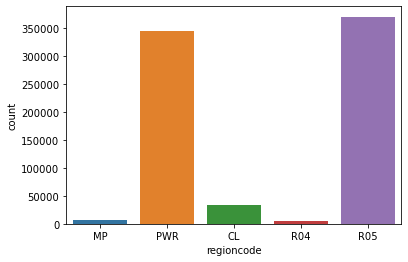

In [82]:
sns.countplot(data=filtered_df, x='regioncode')

Conclusion: The region R05 (Pacific Southwest Region) and PWR (Pacific West Region) has most of the bookings. While MP (Mid Pacific), CL (South Pacific Division) and R04 (Intermountain Region) doesnt have much bookings .

In [83]:
find_regiondescription= filtered_df[filtered_df['regioncode']=='R04']
print(find_regiondescription)

       agency                codehierarchy regioncode     regiondescription  \
554049   USFS   |1|70903|74312|74403|70274        R04  Intermountain Region   
554050   USFS   |1|70903|74312|74403|70274        R04  Intermountain Region   
554051   USFS   |1|70903|74312|74403|70274        R04  Intermountain Region   
554052   USFS   |1|70903|74312|74403|70274        R04  Intermountain Region   
554053   USFS   |1|70903|74312|74403|70274        R04  Intermountain Region   
...       ...                          ...        ...                   ...   
559891   USFS  |1|70903|74312|74403|109334        R04  Intermountain Region   
559892   USFS  |1|70903|74312|74403|109334        R04  Intermountain Region   
559893   USFS  |1|70903|74312|74403|109334        R04  Intermountain Region   
559894   USFS  |1|70903|74312|74403|109334        R04  Intermountain Region   
559895   USFS  |1|70903|74312|74403|109334        R04  Intermountain Region   

        parentlocationid                           

In [84]:
pacific_Southwest_Region_df=filtered_df[filtered_df['regioncode']=='R05']
pacific_Southwest_Region_df.head(5)

,agency,codehierarchy,regioncode,regiondescription,parentlocationid,parentlocation,park,sitetype,usetype,productid,...,enddate,orderdate,nights,orgid,facilityzip,totalbeforetax,numberofpeople,orderdate_dt,start_dt,delta_order_to_start
562919,USFS,|1|70903|72602||10005253,R05,Pacific Southwest Region,74833.0,Stanislaus National Forest,(Lake Alpine) West Shore,STANDARD NONELECTRIC,Overnight,10005268,...,2022-10-10T00:00:00Z,2022-09-18T15:30:40.409568Z,NaN,131,4.0,18.0,6.0,2022-09-18 15:30:40.409568+00:00,2022-10-07 00:00:00+00:00,18
562920,USFS,|1|70903|72602||10005253,R05,Pacific Southwest Region,74833.0,Stanislaus National Forest,(Lake Alpine) West Shore,STANDARD NONELECTRIC,Overnight,10005265,...,2022-10-07T00:00:00Z,2022-05-02T16:40:49.82045Z,NaN,131,4.0,116.0,2.0,2022-05-02 16:40:49.820450+00:00,2022-10-03 00:00:00+00:00,153
562921,USFS,|1|70903|72602||10005253,R05,Pacific Southwest Region,74833.0,Stanislaus National Forest,(Lake Alpine) West Shore,STANDARD NONELECTRIC,Overnight,10005263,...,2022-10-06T00:00:00Z,2022-06-08T20:08:46.258472Z,NaN,131,4.0,18.0,2.0,2022-06-08 20:08:46.258472+00:00,2022-10-03 00:00:00+00:00,116
562922,USFS,|1|70903|72602||10005253,R05,Pacific Southwest Region,74833.0,Stanislaus National Forest,(Lake Alpine) West Shore,STANDARD NONELECTRIC,Overnight,10005268,...,2022-10-06T00:00:00Z,2022-07-10T17:26:37.708659Z,NaN,131,4.0,116.0,3.0,2022-07-10 17:26:37.708659+00:00,2022-10-02 00:00:00+00:00,83
562923,USFS,|1|70903|72602||10005253,R05,Pacific Southwest Region,74833.0,Stanislaus National Forest,(Lake Alpine) West Shore,STANDARD NONELECTRIC,Overnight,10005261,...,2022-10-16T00:00:00Z,2022-09-21T19:14:10.708681Z,NaN,131,4.0,62.0,2.0,2022-09-21 19:14:10.708681+00:00,2022-10-14 00:00:00+00:00,22


After deciding to focus on Pacific Southwest Region with code R05, beacause it has the maximum number of datapoints.Lets find how many unique parks and parent locations are there in Pacific Southwest Region.

In [85]:
pacific_Southwest_Region_df['parentlocation'].unique()

array(['Stanislaus National Forest', 'Plumas National Forest',
       'Tahoe National Forest', 'Eldorado National Forest',
       'Shasta-Trinity National Forest', 'San Bernardino National Forest',
       'Sequoia National Forest', 'Lake Tahoe Basin Management Unit',
       'Modoc National Forest', 'Lassen National Forest',
       'Klamath National Forest', 'Cleveland National Forest',
       'Inyo National Forest', 'Los Padres National Forest',
       'Sierra National Forest', 'Six Rivers National Forest',
       'Mendocino National Forest', 'Angeles National Forest'],
      dtype=object)

In [86]:
pacific_Southwest_Region_df['park'].nunique()

383

In [87]:
pacific_Southwest_Region_df['sitetype'].unique()

array(['STANDARD NONELECTRIC', 'TENT ONLY NONELECTRIC', 'BOAT IN',
       'GROUP STANDARD NONELECTRIC', 'GROUP RV AREA NONELECTRIC',
       'EQUESTRIAN NONELECTRIC', 'RV NONELECTRIC', 'STANDARD ELECTRIC',
       nan, 'CABIN ELECTRIC', 'RV ELECTRIC', 'CABIN NONELECTRIC',
       'GROUP STANDARD AREA NONELECTRIC',
       'GROUP TENT ONLY AREA NONELECTRIC', 'WALK TO', 'GROUP EQUESTRIAN',
       'MANAGEMENT', 'GROUP WALK TO', 'SHELTER NONELECTRIC',
       'GROUP STANDARD ELECTRIC', 'YURT'], dtype=object)

In [88]:
nights=pacific_Southwest_Region_df['nights']
print(nights)

562919    NaN
562920    NaN
562921    NaN
562922    NaN
562923    NaN
           ..
1002300   NaN
1002301   NaN
1002302   NaN
1002303   NaN
1002304   NaN
Name: nights, Length: 370927, dtype: float64


In [89]:
pacific_Southwest_Region_df['parentlocationid'].nunique()

60

In [90]:
frequency_parentlocations = pacific_Southwest_Region_df['parentlocation'].value_counts()
filtered_counts = frequency_parentlocations[frequency_parentlocations > 100]

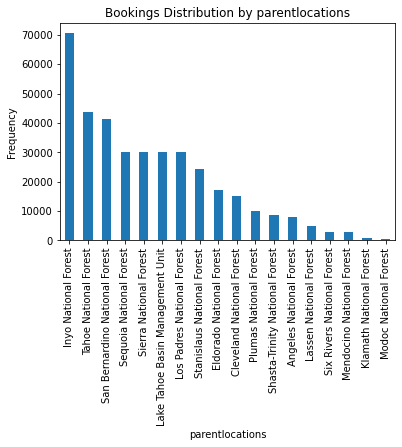

In [91]:
filtered_counts.plot(kind='bar')
plt.title('Bookings Distribution by parentlocations')
plt.xlabel('parentlocations')
plt.ylabel('Frequency')
plt.show()

Looks like Inyou National Forest has the maximum bookings. Lets dive more to understand the trends in that National Forest.

In [92]:
inyo_national_forest_df=pacific_Southwest_Region_df[pacific_Southwest_Region_df['parentlocation']=='Inyo National Forest']
inyo_national_forest_df['parentlocationid'].nunique()

4

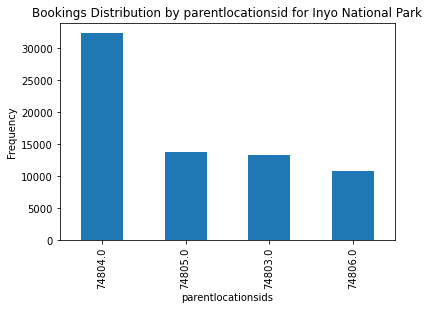

In [93]:
frequency_inyo_national_parentlocationid = inyo_national_forest_df['parentlocationid'].value_counts()
filtered_counts = frequency_inyo_national_parentlocationid[frequency_inyo_national_parentlocationid > 100]
filtered_counts.plot(kind='bar')
plt.title('Bookings Distribution by parentlocationsid for Inyo National Park')
plt.xlabel('parentlocationsids')
plt.ylabel('Frequency')
plt.show()

Looks like for Inyo National Park Parent location ID = 74804 has high number of bookings and in great demand.

In [94]:
inyo_national_forest_most_parent_locationid_df= inyo_national_forest_df[inyo_national_forest_df['parentlocationid']==74804.0]
print(inyo_national_forest_most_parent_locationid_df)

       agency               codehierarchy regioncode  \
581435   USFS  |1|70903|72602|74409|70158        R05   
581436   USFS  |1|70903|72602|74409|70158        R05   
581437   USFS  |1|70903|72602|74409|70158        R05   
581438   USFS  |1|70903|72602|74409|70158        R05   
581439   USFS  |1|70903|72602|74409|70158        R05   
...       ...                         ...        ...   
953710   USFS  |1|70903|72602|74409|75194        R05   
953711   USFS  |1|70903|72602|74409|75194        R05   
953712   USFS  |1|70903|72602|74409|75194        R05   
953713   USFS  |1|70903|72602|74409|75194        R05   
953714   USFS  |1|70903|72602|74409|75194        R05   

               regiondescription  parentlocationid        parentlocation  \
581435  Pacific Southwest Region           74804.0  Inyo National Forest   
581436  Pacific Southwest Region           74804.0  Inyo National Forest   
581437  Pacific Southwest Region           74804.0  Inyo National Forest   
581438  Pacific Southwe

Lets find when were the bookings done for parent ID = 74804.0

In [95]:
inyo_national_forest_most_parent_locationid_df['sitetype'].unique()

array(['GROUP STANDARD NONELECTRIC', 'STANDARD NONELECTRIC', 'WALK TO',
       'EQUESTRIAN NONELECTRIC', 'SHELTER NONELECTRIC',
       'TENT ONLY NONELECTRIC'], dtype=object)

In [96]:
inyo_national_forest_most_parent_locationid_df['park'].nunique()

12

In [97]:
inyo_national_forest_most_parent_locationid_df['facilityid'].nunique()

12

In [98]:
inyo_national_forest_most_parent_locationid_df['park'].nunique()

12

In [99]:
inyo_national_forest_most_parent_locationid_df.info()
inyo_national_forest_most_parent_locationid_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32386 entries, 581435 to 953714
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   agency                32386 non-null  object             
 1   codehierarchy         32386 non-null  object             
 2   regioncode            32386 non-null  object             
 3   regiondescription     32386 non-null  object             
 4   parentlocationid      32386 non-null  float64            
 5   parentlocation        32386 non-null  object             
 6   park                  32386 non-null  object             
 7   sitetype              32386 non-null  object             
 8   usetype               32386 non-null  object             
 9   productid             32386 non-null  int64              
 10  inventorytype         32386 non-null  object             
 11  facilityid            32386 non-null  int64              
 12

,agency,codehierarchy,regioncode,regiondescription,parentlocationid,parentlocation,park,sitetype,usetype,productid,...,enddate,orderdate,nights,orgid,facilityzip,totalbeforetax,numberofpeople,orderdate_dt,start_dt,delta_order_to_start
581435,USFS,|1|70903|72602|74409|70158,R05,Pacific Southwest Region,74804.0,Inyo National Forest,AGNEW MEADOWS GROUP CAMP,GROUP STANDARD NONELECTRIC,Overnight,67002,...,2023-07-17T00:00:00Z,2022-07-25T19:43:34.288139Z,NaN,131,93529.0,0.0,7.0,2022-07-25 19:43:34.288139+00:00,2023-07-14 00:00:00+00:00,353
581436,USFS,|1|70903|72602|74409|70158,R05,Pacific Southwest Region,74804.0,Inyo National Forest,AGNEW MEADOWS GROUP CAMP,GROUP STANDARD NONELECTRIC,Overnight,67022,...,2023-08-16T00:00:00Z,2022-08-07T03:42:31.83248Z,NaN,131,93529.0,0.0,7.0,2022-08-07 03:42:31.832480+00:00,2023-08-12 00:00:00+00:00,369
581437,USFS,|1|70903|72602|74409|70158,R05,Pacific Southwest Region,74804.0,Inyo National Forest,AGNEW MEADOWS GROUP CAMP,GROUP STANDARD NONELECTRIC,Overnight,67080,...,2023-09-04T00:00:00Z,2022-09-27T02:58:03.08121Z,NaN,131,93529.0,0.0,20.0,2022-09-27 02:58:03.081210+00:00,2023-09-01 00:00:00+00:00,338
581438,USFS,|1|70903|72602|74409|70158,R05,Pacific Southwest Region,74804.0,Inyo National Forest,AGNEW MEADOWS GROUP CAMP,GROUP STANDARD NONELECTRIC,Overnight,67022,...,2023-09-04T00:00:00Z,2022-09-27T02:58:03.08121Z,NaN,131,93529.0,0.0,10.0,2022-09-27 02:58:03.081210+00:00,2023-09-01 00:00:00+00:00,338
581439,USFS,|1|70903|72602|74409|70158,R05,Pacific Southwest Region,74804.0,Inyo National Forest,AGNEW MEADOWS GROUP CAMP,GROUP STANDARD NONELECTRIC,Overnight,67002,...,2023-08-18T00:00:00Z,2022-09-14T02:32:22.746782Z,NaN,131,93529.0,0.0,9.0,2022-09-14 02:32:22.746782+00:00,2023-08-12 00:00:00+00:00,331


In [116]:
# Find the delta for start and end date
inyo_national_forest_most_parent_locationid_df['end_dt'] = pd.to_datetime(inyo_national_forest_most_parent_locationid_df['enddate'], errors='coerce')
inyo_national_forest_most_parent_locationid_df['delta_end_to_start'] = (inyo_national_forest_most_parent_locationid_df['end_dt'] - inyo_national_forest_most_parent_locationid_df['start_dt']).dt.days
inyo_national_forest_most_parent_locationid_df['delta_end_to_start'].unique()

<ipython-input-116-3ff15086669e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inyo_national_forest_most_parent_locationid_df['end_dt'] = pd.to_datetime(inyo_national_forest_most_parent_locationid_df['enddate'], errors='coerce')
<ipython-input-116-3ff15086669e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inyo_national_forest_most_parent_locationid_df['delta_end_to_start'] = (inyo_national_forest_most_parent_locationid_df['end_dt'] - inyo_national_forest_most_parent_locationid_df['start_dt']).dt.days

array([ 3,  4,  6,  5,  2,  1,  7, 13, 14, 11,  9,  8, 10, 12])

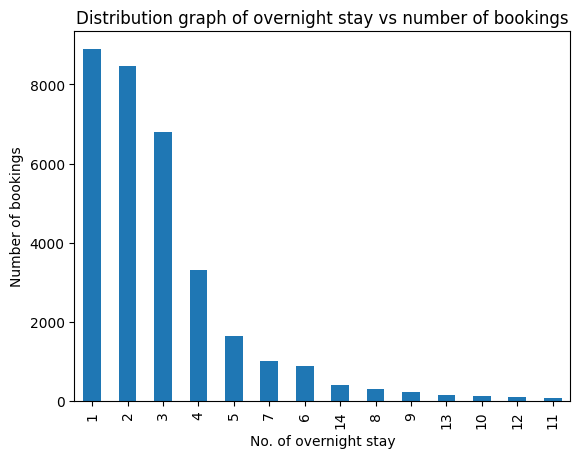

In [93]:
frequency = inyo_national_forest_most_parent_locationid_df['delta_end_to_start'].value_counts()
frequency.plot(kind='bar')
plt.title('Distribution graph of overnight stay vs number of bookings')
plt.xlabel('No. of overnight stay')
plt.ylabel('Number of bookings')
plt.show()

Convert datetime columns to date

In [ ]:
inyo_national_forest_most_parent_locationid_df.info()

In [94]:
inyo_national_forest_most_parent_locationid_df.end_dt.dtype

datetime64[ns, UTC]

In [126]:
#Convert date time to date columns
inyo_national_forest_most_parent_locationid_df['startdate']=pd.to_datetime(inyo_national_forest_most_parent_locationid_df['startdate'])
inyo_national_forest_most_parent_locationid_df['startdate']=inyo_national_forest_most_parent_locationid_df['startdate'].dt.date

inyo_national_forest_most_parent_locationid_df['enddate']=pd.to_datetime(inyo_national_forest_most_parent_locationid_df['enddate'])
inyo_national_forest_most_parent_locationid_df['enddate']=inyo_national_forest_most_parent_locationid_df['enddate'].dt.date


inyo_national_forest_most_parent_locationid_df['orderdate']=pd.to_datetime(inyo_national_forest_most_parent_locationid_df['orderdate'])
inyo_national_forest_most_parent_locationid_df['orderdate']=inyo_national_forest_most_parent_locationid_df['orderdate'].dt.date

Create a line chart / bar chart for each park and order date (monthly). 

In [117]:
inyo_national_forest_most_parent_locationid_df['orderdate'].head(2)

581435    2022-07-25
581436    2022-08-07
Name: orderdate, dtype: object

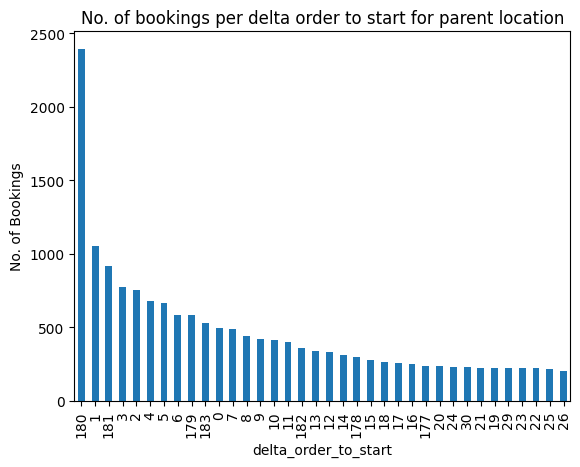

In [125]:
frequency_delta_order_to_start = inyo_national_forest_most_parent_locationid_df ['delta_order_to_start'].value_counts()
filtered_counts = frequency_delta_order_to_start[frequency_delta_order_to_start > 200]

filtered_counts.plot(kind='bar')
plt.title('No. of bookings per delta order to start for parent location')
plt.xlabel('delta_order_to_start')
plt.ylabel('No. of Bookings')
plt.show()



From the above graph we can say that most of the people book the overnight recreation about 6 months ahead of time.

Modify above graph for only tents and exclude other like trailer and RVs

In [ ]:
inyo_national_forest_most_parent_locationid_df.head(4).T

In [ ]:
inyo_national_forest_most_parent_locationid_df['sitetype'].unique()

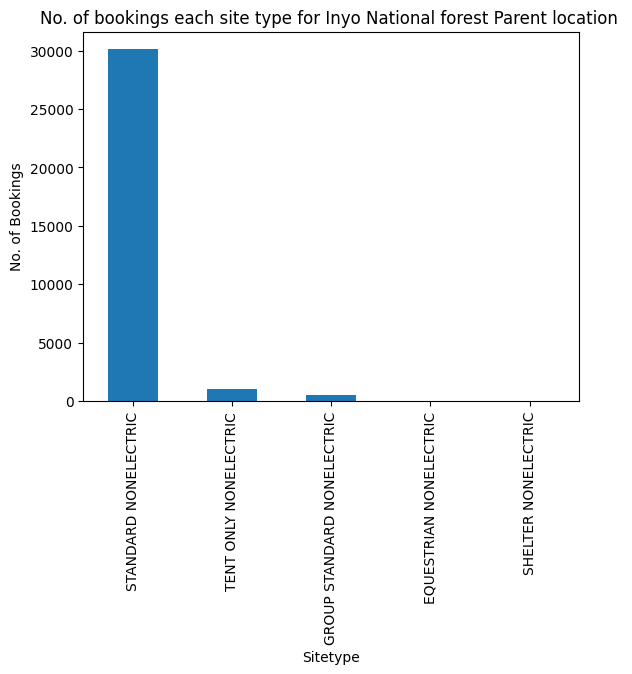

In [130]:
frequency_start_date = inyo_national_forest_most_parent_locationid_df ['sitetype'].value_counts()
filtered_counts = frequency_start_date[frequency_start_date > 10]
filtered_counts.plot(kind='bar')
plt.title('No. of bookings each site type for Inyo National forest Parent location ')
plt.xlabel('Sitetype')
plt.ylabel('No. of Bookings')
plt.show()


Its interesting that A very high number bookings are for Standard non electric, and few for tent only Nonelectric, walk to and Group standard Non electric. we can filter the dataframe by dopping out 'walk to' get the exact number.  


In [114]:
inyo_national_forest_most_parent_locationid_df=inyo_national_forest_most_parent_locationid_df[inyo_national_forest_most_parent_locationid_df['sitetype']!='WALK TO']
inyo_national_forest_most_parent_locationid_df['sitetype'].unique()

array(['GROUP STANDARD NONELECTRIC', 'STANDARD NONELECTRIC',
       'EQUESTRIAN NONELECTRIC', 'SHELTER NONELECTRIC',
       'TENT ONLY NONELECTRIC'], dtype=object)

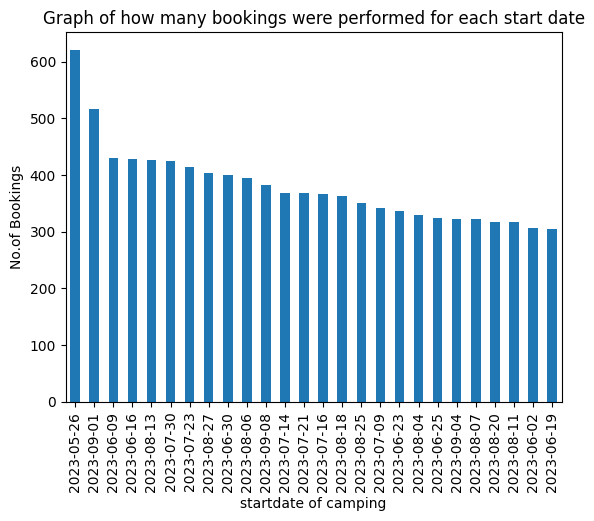

In [128]:

frequency_start_date = inyo_national_forest_most_parent_locationid_df ['startdate'].value_counts()
filtered_counts = frequency_start_date[frequency_start_date > 300]
filtered_counts.plot(kind='bar')
plt.title('Graph of how many bookings were performed for each start date')
plt.xlabel('startdate of camping')
plt.ylabel('No.of Bookings')
plt.show()

Above frequency graph demonstrates that the campsites were booked by more people which has start date on 5/26 which is the summer long weekend time. And the the subsequent dates were also seen where start date was around weekends.

##### Split booking by days to count frequency. Now we want to find out if for a given date the campsite was booked or not. For example- in above example, 5/26 was start date for many bookings but there might be people who come earlier date and still occupy the campsites.In such case also, the campsite will be busy on 5/26.

In below Python code, the date was calculated to accomodate how many total sites were booked for a particular date.

In [131]:
start_dates = inyo_national_forest_most_parent_locationid_df['startdate'].to_numpy()
delta_end_to_start = inyo_national_forest_most_parent_locationid_df['delta_end_to_start'].to_numpy()
print(delta_end_to_start)
import datetime
dates = []

for idx, date in enumerate(start_dates):
    days = delta_end_to_start[idx]
    for day in range(days +1):
        next_date = date + datetime.timedelta(days=day)
        dates.append(next_date)

date_freq_df = pd.DataFrame({'date': dates})
print(date_freq_df.head())


[3 4 3 ... 4 3 2]
         date
0  2023-07-14
1  2023-07-15
2  2023-07-16
3  2023-07-17
4  2023-08-12


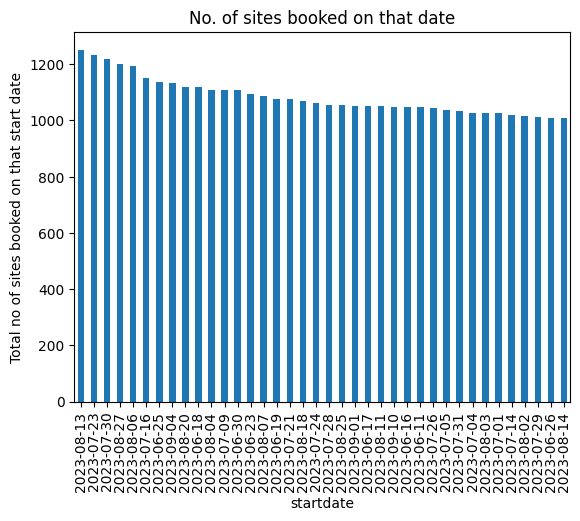

In [135]:
frequency_start_date = date_freq_df ['date'].value_counts()
filtered_counts = frequency_start_date[frequency_start_date > 1005]
filtered_counts.plot(kind='bar')
plt.title('No. of sites booked on that date')
plt.xlabel('startdate')
plt.ylabel('Total no of sites booked on that start date')
plt.show()

The above graph gives us accurate undersnading of the fact that just by analyzing the start date of an event doesnt give us a clear view of complete capacity of that particular Inyo National Park Parent location ID = 74804. The above graph suggests a story about which date was a busy day with respect to number of people expected in that Parent location ID = 74804 for that date.

In [136]:
start_dates = inyo_national_forest_most_parent_locationid_df['startdate'].to_numpy()
order_dates = inyo_national_forest_most_parent_locationid_df['orderdate'].to_numpy()

import datetime
date_map = {}
first_jan_23 = datetime.date(year=2023, month=1, day=1)
idx = 0
for day in range(365):
    date_map[str(first_jan_23 + datetime.timedelta(days=day))] = idx
    idx += 1

matrix = [[0 for _ in range(365)] for _ in range(365)]
for idx in range(len(start_dates)):
    order_date = order_dates[idx]
    start_date = start_dates[idx]
    if str(order_date) not in date_map or str(start_date) not in date_map:
        continue
    order_date_index = date_map[str(order_date)]
    start_date_index = date_map[str(start_date)]
    matrix[order_date_index][start_date_index] += 1

print(matrix)

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 2, 1, 2, 0, 0, 1, 0, 1, 2, 2, 6, 2, 1, 3, 2, 5, 3, 0, 1, 2, 0, 1, 3, 2, 0, 1, 0, 1, 0, 3, 1, 1, 1, 2, 2, 0, 3, 8, 38, 1, 1, 0, 0, 2, 1, 0, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

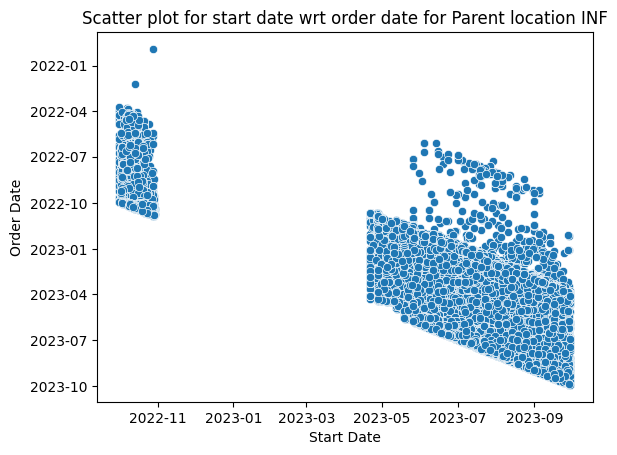

In [137]:
plt.figure()
sns.scatterplot(x=inyo_national_forest_most_parent_locationid_df['startdate'], y=inyo_national_forest_most_parent_locationid_df['orderdate'])
plt.xlabel(f'Start Date')
plt.ylabel(f'Order Date')
plt.title(f'Scatter plot for start date wrt order date for Parent location INF')
plt.show()

The scatter plot for Start date and order date suggests that a vast number of bookings were done ahead of time. Also we can conclude that the months of Dec, Jan, until May there are no start dates. So the peak time for camping for this parent ID starts summer until Fall season.
 

<Axes: xlabel='startdate', ylabel='delta_order_to_start'>

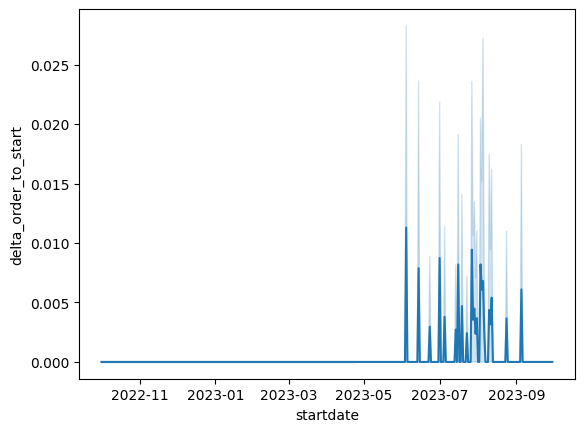

In [138]:
sns.lineplot(data=inyo_national_forest_most_parent_locationid_df, x=inyo_national_forest_most_parent_locationid_df['startdate'], y=inyo_national_forest_most_parent_locationid_df['delta_order_to_start']>360)


In [139]:
inyo_national_forest_most_parent_locationid_df.head(4).T

,581435,581436,581437,581438
agency,USFS,USFS,USFS,USFS
codehierarchy,|1|70903|72602|74409|70158,|1|70903|72602|74409|70158,|1|70903|72602|74409|70158,|1|70903|72602|74409|70158
regioncode,R05,R05,R05,R05
regiondescription,Pacific Southwest Region,Pacific Southwest Region,Pacific Southwest Region,Pacific Southwest Region
parentlocationid,74804.0,74804.0,74804.0,74804.0
parentlocation,Inyo National Forest,Inyo National Forest,Inyo National Forest,Inyo National Forest
park,AGNEW MEADOWS GROUP CAMP,AGNEW MEADOWS GROUP CAMP,AGNEW MEADOWS GROUP CAMP,AGNEW MEADOWS GROUP CAMP
sitetype,GROUP STANDARD NONELECTRIC,GROUP STANDARD NONELECTRIC,GROUP STANDARD NONELECTRIC,GROUP STANDARD NONELECTRIC
usetype,Overnight,Overnight,Overnight,Overnight
productid,67002,67022,67080,67022


In [140]:
inyo_national_forest_most_parent_locationid_df['productid'].nunique()

559

In [141]:
inyo_national_forest_most_parent_locationid_df['facilityid'].nunique()

12

In [142]:
inyo_national_forest_most_parent_locationid_df['facilityid'].unique()

array([231956, 231957, 232270, 232271, 232398, 233404, 233830, 233860,
       234290, 234311, 234329, 234330])

In Inyo National Park Parent location ID = 74804 , there are 559 unique  productID, 12 facility IDs.

Below create subset dataframes for different facilityIDs.

In [143]:
facility_filter_df=inyo_national_forest_most_parent_locationid_df[inyo_national_forest_most_parent_locationid_df['facilityid']==231956]

In [144]:
df2=inyo_national_forest_most_parent_locationid_df[inyo_national_forest_most_parent_locationid_df['facilityid']==231957]

In [145]:
df3=inyo_national_forest_most_parent_locationid_df[inyo_national_forest_most_parent_locationid_df['facilityid']==232270]

In [146]:
df4=inyo_national_forest_most_parent_locationid_df[inyo_national_forest_most_parent_locationid_df['facilityid']==232271]

Lets draw a line plot to understand the trend for Inyo National Park Parent location ID = 74804 and facilityid =231956

<Axes: xlabel='orderdate', ylabel='delta_order_to_start'>

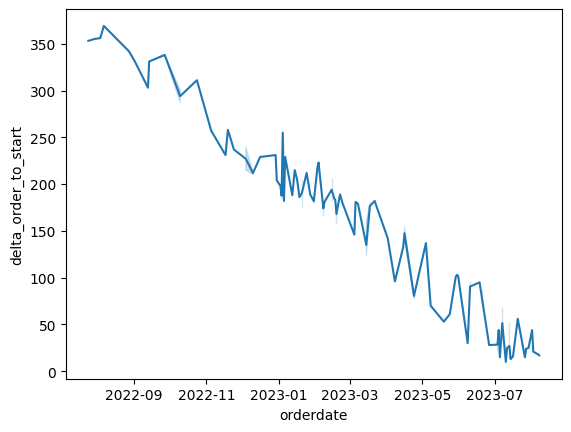

In [147]:
sns.lineplot(data=facility_filter_df, x=facility_filter_df['orderdate'], y=facility_filter_df['delta_order_to_start'])


The above graph shows the trend for orderdate and delta of order to start date.

Lets find eg on a particular date 5/26 how were the orders placed.. undersnad the trends for it when were the boookings were perfoedm.
Average the order days for a particular date. 


In [148]:

average_values = facility_filter_df.groupby('startdate')['delta_order_to_start'].mean()
average_values.name = 'avg_order_date_delta'

# Merge the average values back into the original DataFrame
facility_filter_df1 = facility_filter_df.merge(average_values, left_on='startdate', right_index=True)
facility_filter_df1['startdate'] = facility_filter_df1['startdate'].astype(str).str[5:]
facility_filter_df1 = facility_filter_df1.sort_values('avg_order_date_delta',ascending = False).head(27)

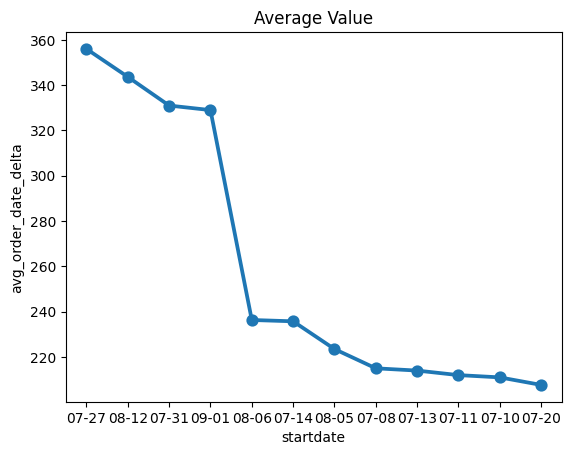

In [149]:
sns.pointplot(x='startdate', y='avg_order_date_delta', data=facility_filter_df1)
plt.title('Average Value')
plt.show()

Above graph shows that eg for 07/27 at a particular site mostly all the bookings were done well ahead of time. The average highest time between order to start date gives clarity about how much that site is in demand for a given date. What can we expect in future if we want to book a facility id for a given date.

Below- Lets create time series line plot for facility id = 231956 dataframe.

In [150]:
df1=facility_filter_df
df1.head(2)

,agency,codehierarchy,regioncode,regiondescription,parentlocationid,parentlocation,park,sitetype,usetype,productid,...,nights,orgid,facilityzip,totalbeforetax,numberofpeople,orderdate_dt,start_dt,delta_order_to_start,end_dt,delta_end_to_start
581435,USFS,|1|70903|72602|74409|70158,R05,Pacific Southwest Region,74804.0,Inyo National Forest,AGNEW MEADOWS GROUP CAMP,GROUP STANDARD NONELECTRIC,Overnight,67002,...,NaN,131,93529.0,0.0,7.0,2022-07-25 19:43:34.288139+00:00,2023-07-14 00:00:00+00:00,353,2023-07-17 00:00:00+00:00,3
581436,USFS,|1|70903|72602|74409|70158,R05,Pacific Southwest Region,74804.0,Inyo National Forest,AGNEW MEADOWS GROUP CAMP,GROUP STANDARD NONELECTRIC,Overnight,67022,...,NaN,131,93529.0,0.0,7.0,2022-08-07 03:42:31.832480+00:00,2023-08-12 00:00:00+00:00,369,2023-08-16 00:00:00+00:00,4


Below python code is calculating the exact number of bookings for a particular date. 

In [151]:
start_dates = df1['startdate'].to_numpy()
delta_end_to_start = df1['delta_end_to_start'].to_numpy()
print(delta_end_to_start)
import datetime
dates = []

for idx, date in enumerate(start_dates):
    days = delta_end_to_start[idx]
    for day in range(days+ 1):
        next_date = date + datetime.timedelta(days=day)
        dates.append(next_date)

        

date_freq_df = pd.DataFrame({'date': dates})
print(date_freq_df.head())

[3 4 3 3 6 6 5 5 6 3 3 3 3 3 6 2 2 2 2 3 1 4 4 1 1 4 2 2 2 2 2 1 1 2 2 3 2
 3 2 2 4 4 3 4 7 3 2 2 2 2 2 2 1 2 2 1 1 1 5 1 1 1 1 5 2 3 4 2 1 1 1 4 3 2
 4 1 2 4 1 1 1 2 1 2 1 5 1 7 1 4 1 1 2 1 1 2 1 1 3 4 2 3 1 1 4 1 1 2 1 1 1
 1 1 2 4 3 2]
         date
0  2023-07-14
1  2023-07-15
2  2023-07-16
3  2023-07-17
4  2023-08-12


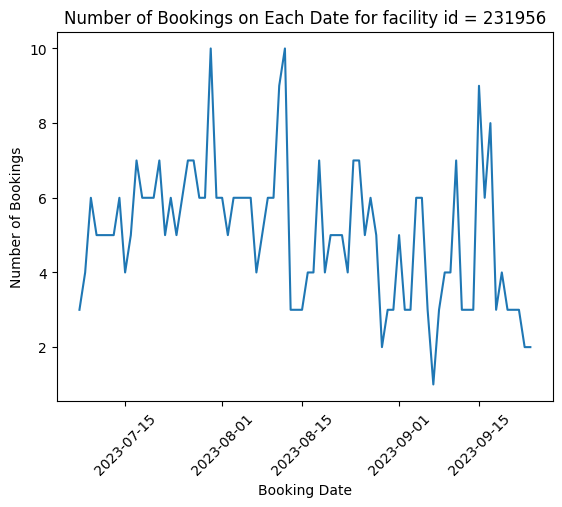

In [152]:
# Creating DataFrame
date_freq_df = pd.DataFrame({'date': dates})

# Count the number of times each date appears
date_counts = date_freq_df['date'].value_counts().sort_index()
date_counts = date_counts.reset_index()
date_counts.columns = ['date', 'bookings']

# Convert 'date' column to datetime if not already done
date_counts['date'] = pd.to_datetime(date_counts['date'])

# Set 'date' as the index
date_counts.set_index('date', inplace=True)

# Plotting
sns.lineplot(data=date_counts, x=date_counts.index, y='bookings')
plt.xlabel('Booking Date')
plt.ylabel('Number of Bookings')
plt.title('Number of Bookings on Each Date for facility id = 231956')
plt.xticks(rotation=45)  # Rotate date labels for better visibility
plt.show()

Above graph shows the trend of bookings for facility Id = 231956 with respect to each date. 

Next Steps
1. We now know data for one facility ID. We can calculate for other facilityIds in the given parentID

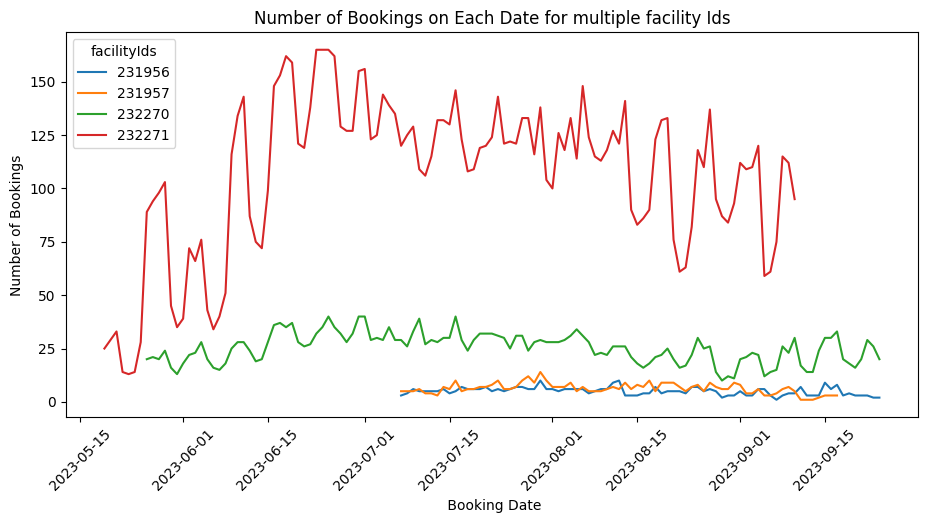

In [153]:
# Sample data for multiple dataframes
dataframes = [df1,df2,df3,df4]


# Combine all processed data into a new DataFrame for plotting
all_date_counts = pd.DataFrame()

for i, df in enumerate(dataframes):
    # Extract dates and deltas
    start_dates = df['startdate'].to_numpy()
    delta_end_to_start = df['delta_end_to_start'].to_numpy()
    
    dates = []
    for idx, date in enumerate(start_dates):
        days = delta_end_to_start[idx]
        for day in range(days + 1):  # Including the last day
            next_date = date + datetime.timedelta(days=day)
            dates.append(next_date)

    # Creating DataFrame
    date_freq_df = pd.DataFrame({'date': dates})

    # Count the number of times each date appears
    date_counts = date_freq_df['date'].value_counts().sort_index()
    date_counts = date_counts.reset_index()
    date_counts.columns = ['date', 'bookings']
    date_counts['dataset'] = f'DataFrame {i+1}'  # Label for DataFrame

    # Combine the data
    all_date_counts = pd.concat([all_date_counts, date_counts])

# Convert 'date' column to datetime if not already done
all_date_counts['date'] = pd.to_datetime(all_date_counts['date'])

# Plotting
plt.figure(figsize=(11, 5))
plot=sns.lineplot(data=all_date_counts, x='date', y='bookings', hue='dataset')
plt.xlabel(' Booking Date')
plt.ylabel('Number of Bookings')
plt.title('Number of Bookings on Each Date for multiple facility Ids')
plt.xticks(rotation=45)  # Rotate date labels for better visibility

# Customizing the legend
legend_labels = ['231956', '231957', '232270', '232271']
handles, _ = plot.get_legend_handles_labels()
plot.legend(handles=handles, labels=legend_labels, loc='upper left', title='facilityIds', fontsize='medium', frameon=True)

plt.show()


Above graph shows the trend of Bookings for 4 facilityIDs for Parent location ID = 74804. 

## Summary
### 1.Most of the campsites in California are booked for 1, 2 and 3 nights.
### 2.USFS and NPS agencies have almost all the bookings.
### 3.The most equipment used for campings is Tents, followed by RV and Trailers.
### 4.Number of people is 2, 6, 4 for most of the campsites in california.
### 5.In the California dataset there are 5 distinct region codes and descriptions and 480 parks, 44 unique parent locations and 86 parent location Ids.
### 6.The region R05 (Pacific Southwest Region) and PWR(Pacific West Region) have most of the bookings. While (MP) mid pacific , CL (south pacific division) and R04 (Intermountain region) have lower bookings comparatively.
### 7.The Pacific Southwest Region has 383 unique parks,with Inyo National Forest (parent location ) more frequently booked.
### 8.Inyo National Forest has 4 parent location Ids with 74804.0 as the maximum bookings.
### 9.PL ID 74804 has 12 parks and 12 facility Ids. So maybe each park has a unique facility ID..
### 10.Calculate the delta end to start, it gives number of days people opt to visit 1, 2 and 3 are most visited in Inyo National Forest has 4 parent location Ids with 74804.0
### 11.A very high number of bookings are done 180,181, 179 days ahead of time.
### 12.A very high number bookings are for Standard non electric,and few for tent only Nonelectric, walk to and Group standard Non electric. 
### 13.The data for start dates and frequency shows that summer time and specifically long weekends are in high demand.
### 14.The scatter plot for Start date and order date suggests that a vast number of bookings were done ahead of time.


In [117]:
inyo_national_forest_most_parent_locationid_df.head()

,agency,codehierarchy,regioncode,regiondescription,parentlocationid,parentlocation,park,sitetype,usetype,productid,...,nights,orgid,facilityzip,totalbeforetax,numberofpeople,orderdate_dt,start_dt,delta_order_to_start,end_dt,delta_end_to_start
581435,USFS,|1|70903|72602|74409|70158,R05,Pacific Southwest Region,74804.0,Inyo National Forest,AGNEW MEADOWS GROUP CAMP,GROUP STANDARD NONELECTRIC,Overnight,67002,...,NaN,131,93529.0,0.0,7.0,2022-07-25 19:43:34.288139+00:00,2023-07-14 00:00:00+00:00,353,2023-07-17 00:00:00+00:00,3
581436,USFS,|1|70903|72602|74409|70158,R05,Pacific Southwest Region,74804.0,Inyo National Forest,AGNEW MEADOWS GROUP CAMP,GROUP STANDARD NONELECTRIC,Overnight,67022,...,NaN,131,93529.0,0.0,7.0,2022-08-07 03:42:31.832480+00:00,2023-08-12 00:00:00+00:00,369,2023-08-16 00:00:00+00:00,4
581437,USFS,|1|70903|72602|74409|70158,R05,Pacific Southwest Region,74804.0,Inyo National Forest,AGNEW MEADOWS GROUP CAMP,GROUP STANDARD NONELECTRIC,Overnight,67080,...,NaN,131,93529.0,0.0,20.0,2022-09-27 02:58:03.081210+00:00,2023-09-01 00:00:00+00:00,338,2023-09-04 00:00:00+00:00,3
581438,USFS,|1|70903|72602|74409|70158,R05,Pacific Southwest Region,74804.0,Inyo National Forest,AGNEW MEADOWS GROUP CAMP,GROUP STANDARD NONELECTRIC,Overnight,67022,...,NaN,131,93529.0,0.0,10.0,2022-09-27 02:58:03.081210+00:00,2023-09-01 00:00:00+00:00,338,2023-09-04 00:00:00+00:00,3
581439,USFS,|1|70903|72602|74409|70158,R05,Pacific Southwest Region,74804.0,Inyo National Forest,AGNEW MEADOWS GROUP CAMP,GROUP STANDARD NONELECTRIC,Overnight,67002,...,NaN,131,93529.0,0.0,9.0,2022-09-14 02:32:22.746782+00:00,2023-08-12 00:00:00+00:00,331,2023-08-18 00:00:00+00:00,6


Create a csv file that can be used for further preprocessing and modelling. This is a subset of data for Inyo National forest and Parent location ID = 74804

In [120]:
inyo_national_forest_most_parent_locationid_df.isnull().sum()

agency                      0
codehierarchy               0
regioncode                  0
regiondescription           0
parentlocationid            0
parentlocation              0
park                        0
sitetype                    0
usetype                     0
productid                   0
inventorytype               0
facilityid                  0
facilitystate               0
totalpaid                   0
startdate                   0
enddate                     0
orderdate                   0
nights                  32386
orgid                       0
facilityzip                 0
totalbeforetax              0
numberofpeople              0
orderdate_dt                0
start_dt                    0
delta_order_to_start        0
end_dt                      0
delta_end_to_start          0
dtype: int64

In [121]:
inyo_national_forest_most_parent_locationid_df.to_csv('eda_output.csv', index=False)